# Gerakan bola dilempar ke atas

**I Wayan Sudiarta, Ph.D.**

Pada latihan ini, kita menggunakan Python dan modul Matplotlib untuk perhitungan dan visualisasi gerakan bola dilempar dari atas permukaan Bumi. Perhatikan Gambar di bawah ini.

![bola dilempar ke atas](bola-dilempar.png)

Kita menyelesaikan persamaan Newton yaitu
\begin{equation}
a_x = -g
\end{equation}

\begin{equation}
\frac{d^2 x}{d t^2} = a_x = -g
\end{equation}

Kita ubah menjadi dua persamaan dengan $v_x = dx/dt$:
\begin{equation}
\frac{d v_x}{d t} = a_x = -g
\end{equation}
\begin{equation}
\frac{d x}{d t} = v_x
\end{equation}


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Inisialisasi parameter

# Delta t dalam sekon
dt = 0.05

# Posisi awal (m) dan Kecepatan awal dalam m/s
x0 = 0.0
vx0 = 10.0

# Nilai gravitasi Bumi dalam m/s^2
g = 9.81

## Metode Euler

Dengan metode Euler kita memperoleh persamaan iterasi numerik untuk selang waktu $\Delta t$ adalah
\begin{equation}
x_{n+1} = x_n + v_{x,n}\Delta t
\end{equation}
\begin{equation}
v_{x,n+1} = v_{x,n} + a_{x,n}\Delta t
\end{equation}

In [4]:
# Iterasi metode Euler
# Notasi:
# xn untuk posisi pada indeks n
# xnp1 untuk posisi pada indeks n+1 (n plus 1)

# Nilai awal
xn = x0
vxn = vx0

# Array
x = [xn]
vx = [vxn]
t = [0.0]
tn = 0.0

for i in range(40):
    # Update percepatan
    axn = -g

    # Metode Euler
    xnp1 = xn + vxn*dt
    vxnp1 = vxn + axn*dt

    # Simpan untuk iterasi selanjunya
    xn = xnp1
    vxn = vxnp1
    tn += dt

    # Simpan hasil pada list
    x.append(xnp1)
    vx.append(vxn)
    t.append(tn)

In [5]:
# Nilai eksak dihitung dengan
# Persamaan gerak lurus dengan a konstan
xe = [x0]
vxe = [vx0]
axn = -g
tn = 0.0
for i in range(40):
    tn += dt
    # Persamaan gerak
    vxn = vx0 + axn*tn
    xn = x0 + vx0*tn + 0.5*axn*tn**2
    # Simpan
    vxe.append(vxn)
    xe.append(xn)

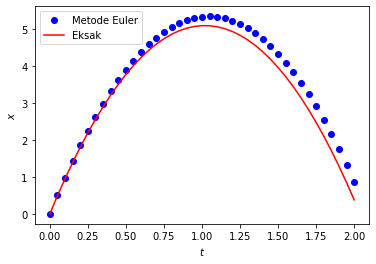

In [6]:
#Visualisasi
plt.plot(t,x,'ob', label = 'Metode Euler')
plt.plot(t,xe,'-r', label = 'Eksak')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

## Metode Leapfrog

Persamaan iterasi numerik untuk metode leapfrog dengan selang waktu $\Delta t$ adalah
\begin{equation}
x_{n+1} = x_n + v_{x,n+\tfrac{1}{2}}\Delta t
\end{equation}
\begin{equation}
v_{x,n+\tfrac{1}{2}} = v_{x,n-\tfrac{1}{2}} + a_{x,n}\Delta t
\end{equation}

Untuk memulai iterasi kita membutuhkan pendekatan untuk kecepatan pada waktu $t = \tfrac{1}{2}$, $v_{x,\tfrac{1}{2}}$.
\begin{equation}
v_{x,\tfrac{1}{2}} = v_{x,0} + \frac{1}{2} a_{x,0}\Delta t
\end{equation}



In [7]:
# Iterasi metode leapfrog
# Notasi:
# xn untuk posisi pada indeks n
# xnp1 untuk posisi pada indeks n+1 (n plus 1)
# vxnps untuk posisi pada indeks n+1/2 (n plus 1/2)
# vxnms untuk posisi pada indeks n-1/2 (n minus 1/2)

# Nilai awal
ax0 = -g
vxs0 = vx0 + 0.5*ax0*dt

# Array
x = [x0]
vx = [vxs0]
t = [0.0]
tn = 0.0

xn = x0
vxn = vxs0
for i in range(40):
    # Update percepatan
    axn = -g

    # Metode Setengah Langkah
    xnp1 = xn + vxn*dt
    vxnp1 = vxn + axn*dt
    
    # Simpan untuk iterasi selanjunya
    xn = xnp1
    vxn = vxnp1
    tn += dt

    # Simpan hasil pada list
    x.append(xn)
    vx.append(vxn)
    t.append(tn)

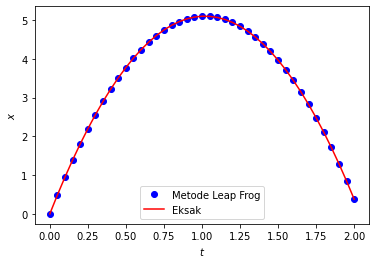

In [8]:
#Visualisasi
plt.plot(t,x,'ob', label = 'Metode Leap Frog')
plt.plot(t,xe,'-r', label = 'Eksak')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

## Metode Verlet versi Posisi

Dengan metode Verlet versi posisi, persamaan iterasi numerik untuk selang waktu $\Delta t$ adalah
\begin{equation}
x_{n+1} = 2 x_n - x_{n-1} + a_{x,n}(\Delta t)^2
\end{equation}

In [9]:
# Iterasi metode Verlet versi posisi
# Notasi:
# xn untuk posisi pada indeks n
# xnp1 untuk posisi pada indeks n+1 (n plus 1)
# xnm1 untuk posisi pada indeks n-1 (n minus 1)

# Nilai awal
ax0 = -g
x1 = x0 + vx0*dt + 0.5*ax0*dt**2

xnm1 = x0
xn = x1

# Array
x = [x0, x1]
t2 = [0.0, dt]
tn = dt

for i in range(40):
    # Update percepatan
    axn = -g

    # Metode Verlet versi posisi
    xnp1 = 2*xn - xnm1 + axn*dt**2

    # Simpan untuk iterasi selanjunya
    xnm1 = xn
    xn   = xnp1
    tn += dt

    # Simpan hasil pada list
    x.append(xnp1)
    t2.append(tn)

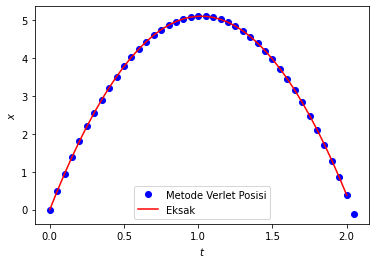

In [10]:
#Visualisasi
plt.plot(t2,x,'ob', label = 'Metode Verlet Posisi')
plt.plot(t,xe,'-r', label = 'Eksak')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

## Metode Verlet versi Kecepatan

Dengan metode Verlet versi posisi, persamaan iterasi numerik untuk selang waktu $\Delta t$ adalah
\begin{equation}
x_{n+1} = x_n + v_{n}\Delta t + \frac{1}{2}a_{x,n}(\Delta t)^2
\end{equation}

\begin{equation}
v_{x,n+1} = v_{x,n} + \frac{1}{2}(a_{x,n} + a_{x,n+1})\Delta t
\end{equation}

In [11]:
# Iterasi metode Verlet versi posisi
# Notasi:
# xn untuk posisi pada indeks n
# xnp1 untuk posisi pada indeks n+1 (n plus 1)
# xnm1 untuk posisi pada indeks n-1 (n minus 1)

# Nilai awal
xn = x0
vxn = vx0

# Array
x = [x0]
vx = [vx0]
t = [0.0]
tn = 0.0

for i in range(40):

    # Metode Verlet versi posisi
    vxnp1 = vxn + 0.5*axn*dt

    xnp1 = xn + vxn*dt + 0.5*axn*dt**2

    # Update percepatan
    axn = -g

    vxnp1 = vxnp1 + 0.5*axn*dt

    # Simpan untuk iterasi selanjunya
    xn = xnp1
    vxn = vxnp1
    tn += dt

    # Simpan hasil pada list
    x.append(xn)
    vx.append(vxn)
    t.append(tn)

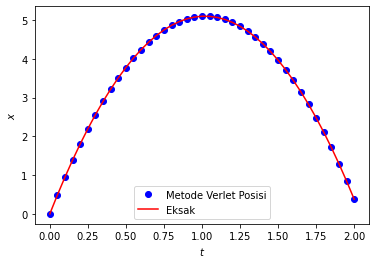

In [12]:
#Visualisasi
plt.plot(t,x,'ob', label = 'Metode Verlet Posisi')
plt.plot(t,xe,'-r', label = 'Eksak')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()